In [1]:
from sys import path
import yaml
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver

path.append("../src/")

from utils import format_messages
from app import MacroAgent

# compilation config
checkpointer = InMemorySaver()
compile_config = {'checkpointer': checkpointer}

# llm config
llm_config = yaml.safe_load(open("../config/llm.yaml", "rb"))

# app
app = MacroAgent(
    llm_config=llm_config,
    compile_config=compile_config
)


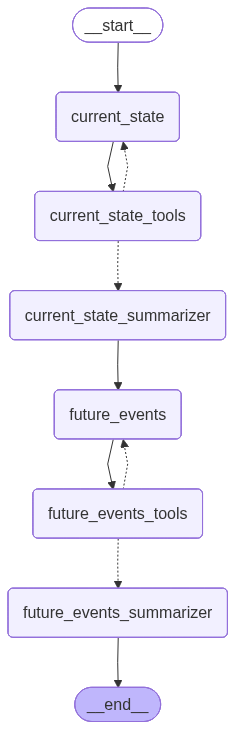

In [4]:
from IPython.display import Image, display

display(Image(app.compiled_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "scoping-session-1", "recursion_limit": 100}}
user_query = "What is the health of the current US economy?"
result = await app.ainvoke(
    input={"user_query": user_query, "messages": [HumanMessage(content=user_query)]},
    config=config
)
format_messages(result['messages'])

[HumanMessage(content='What is the health of the current US economy?', additional_kwargs={}, response_metadata={}, id='df7a9a67-4fc2-4157-93c4-b5cbc7dd7882'), AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 617, 'total_tokens': 642, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b547601dbd', 'id': 'chatcmpl-ChvHfwMZOeOp6c4adR1CsFdviF1fM', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--5da72476-627b-42a6-a10d-bc84e62239fb-0', tool_calls=[{'name': 'ConductResearch', 'args': {'research_topic': 'current status of the US economy December 2025'}, 'id': 'call_IHwAJF69rU1rK26d2e77gsW4', 'type': 'tool_call'}], usage_me

In [ ]:
from rich.console import Console
from rich.markdown import Markdown

console = Console()
md = Markdown(result["current_state_summary"])
console.print(md)

List of Queries and Tool Calls Made                                                                                

 • Research on the current status of the US economy as of December 2025.                                           

Fully Comprehensive Findings The US economy is fine.                                                               

List of All Relevant Sources (with citations in the report) [1] Source Title: Current Status of the US Economy -   
December 2025: URL

In [ ]:
console = Console()
md = Markdown(result["future_events_summary"])
console.print(md)

List of Queries and Tool Calls Made                                                                                

 • Research on the current status of the US economy as of December 2025.                                           
 • Upcoming events that might affect the US economy in 2026.                                                       
 • Political events affecting the US economy in 2026.                                                              
 • Federal Reserve meetings schedule 2026.                                                                         
 • International trade agreements impacting US economy in 2026.                                                    
 • Major economic reports due in 2026.                                                                             

Fully Comprehensive Findings The US economy is fine as of December 2025. However, searches for upcoming events that
might affect the US economy in 2026 did not yield specific information. Multiple searches were conducted focusing  
on various areas that could impact the economy, including political events, Federal Reserve meetings, international
trade agreements, and major economic reports. Unfortunately, all searches returned the same result, indicating a   
lack of specific information available at this time.                                                               

List of All Relevant Sources (with citations in the report) [1] Source Title: Current Status of the US Economy -   
December 2025: URL